# Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

medical_df=pd.read_csv("/content/heart_dataset_mini.csv")



In [ ]:
# prompt: remove outliers in age column based on iqr

cols = ["age","chol"]
for i in cols:
  Q1 = medical_df['age'].quantile(0.25)
  Q3 = medical_df['age'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  medical_df = medical_df[(medical_df['age'] >= lower_bound) & (medical_df['age'] <= upper_bound)]

# Impute missing values in 'age' and 'chol'
for col in ['age', 'chol']:
    # Calculate the median for each column
    mean_val = medical_df[col].mean()
    # Fill NaN values with the median value
    medical_df[col].fillna(mean_val, inplace=True)

X=medical_df[cols]
X.head()

<ipython-input-2-c05f76e1e68e>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_df[col].fillna(mean_val, inplace=True)


,age,chol
0,63.0,233.0
1,37.0,250.0
2,41.0,204.0
3,56.0,236.0
4,57.0,354.0


Text(0.5, 0, 'age')

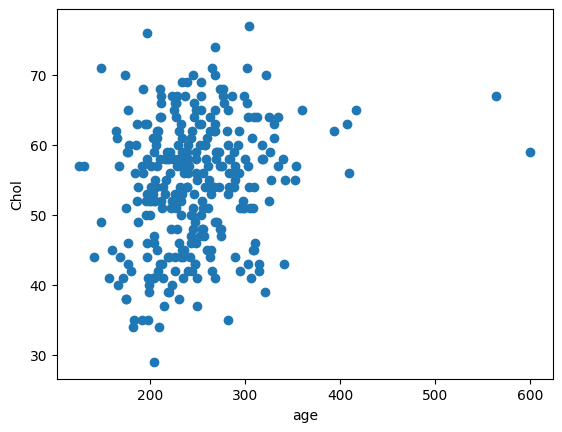

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X.chol,X.age)
plt.ylabel("Chol")
plt.xlabel("age")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

Kmeans Clustering


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Kmeans clustering
model=KMeans(n_clusters=3)
#model fit
model=model.fit(X)
K_labels=model.labels_
k_centroid=model.cluster_centers_

#silhouette
print(f"Number of Cluster: {3}, silhouette_score :{silhouette_score(X,K_labels)}")

Number of Cluster: 3, silhouette_score :0.36278835418656835


<ipython-input-6-5d7da997832e>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


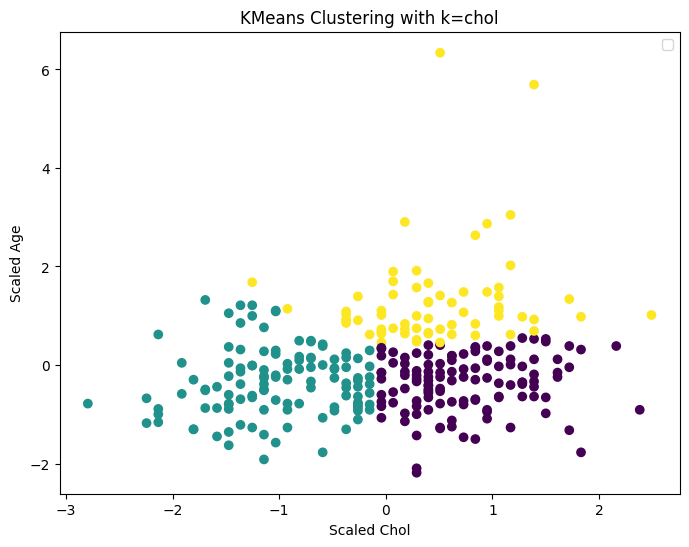

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(X[:, 0], X[:, 1], c=K_labels, cmap='viridis')  # Use X[:, 0] and X[:, 1] for the scaled data
plt.title(f'KMeans Clustering with k={3}')
plt.xlabel('Scaled Chol')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

In [ ]:
K_labels

array([0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0,
       0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0,
       2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2,
       0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0,
       0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
# prompt: assign labels to a new colun

# Assuming 'medical_df' is your DataFrame and 'K_labels' contains the cluster labels

medical_df['cluster_labels'] = K_labels


In [ ]:
medical_df

,Patient id,age,chol,cluster_labels
0,1,63.0,233.0,0
1,2,37.0,250.0,1
2,3,41.0,204.0,1
3,4,56.0,236.0,0
4,5,57.0,354.0,2
...,...,...,...,...
299,299,57.0,241.0,0
300,300,45.0,264.0,1
301,301,68.0,193.0,0
302,302,57.0,131.0,0


In [ ]:
# prompt: groupby cluster label to get average age and chol level of each group
# Group by cluster label and calculate the average age and cholesterol level
cluster_stats = medical_df.groupby('cluster_labels').agg({'age': 'mean', 'chol': 'mean'})
cluster_stats


,age,chol
cluster_labels,,
0,44.663636,227.996164
1,58.821918,314.890411
2,60.638655,224.386555


In [ ]:
# prompt: how to classify a new data point

import numpy as np

def classify_new_datapoint(new_datapoint, scaler, model):
    # Scale the new data point using the same scaler used for training
    scaled_new_datapoint = scaler.transform(np.array(new_datapoint).reshape(1, -1))

    # Predict the cluster for the new data point
    predicted_cluster = model.predict(scaled_new_datapoint)[0]

    return predicted_cluster

# Example usage (assuming you have 'scaler' and 'model' from your KMeans training)
new_datapoint = [80, 200]  # Example new data point [age, chol]
predicted_cluster = classify_new_datapoint(new_datapoint, scaler, model)
print(f"The new data point belongs to cluster: {predicted_cluster}")

The new data point belongs to cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: clustering plot for the above code for each k


# ... (Your existing code for data loading, preprocessing, and KMeans)

# Plotting the clusters for each k
for i in range(2, 10):
    model = KMeans(n_clusters=i)
    model = model.fit(X)
    K_labels = model.labels_

    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.scatter(X[:, 0], X[:, 1], c=K_labels, cmap='viridis')  # Use X[:, 0] and X[:, 1] for the scaled data
    plt.title(f'KMeans Clustering with k={i}')
    plt.xlabel('Scaled Chol')
    plt.ylabel('Scaled Age')
    plt.legend()
    plt.show()
